# Data-driven modeling 1 - multiscale problems and nonlinear material behavior

Lecturer: Dr.-Ing. Mauricio Fernández

## Contents of this lecture

[1. Multiscale problems](#1.-Multiscale-problems)

[2. Data-driven material modeling](#2.-Data-driven-material-modeling)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Two-scale problem

Consider the following problem (see [Fritzen, Fernández and Larsson, 2019](https://www.frontiersin.org/articles/10.3389/fmats.2019.00075/full)), where $\overline{\varepsilon}$ is the macroscopic infinitesimal strain tensor and $\overline{\sigma}$ is the macroscopic Cauchy stress tensor in the microscopic problem.

<img src="./files/figures/problem.png" alt="neural netowork" width="400" align="center">

How would you solve the macroscopic and microscopic problems in a mechanical simulation?

### Approaches

<img src="./files/figures/problem.png" alt="neural netowork" width="400" align="right">

Macro:
* FE
* FD
* Other numerical approaches

Micro:
* FE (resulting in FE$^2$)
* FFT
* Analytical methods
* ?

### What can you do if you have collected data?

<img src="./files/figures/rve.png" width="400" align="right">

Image you have access to a dataset

$$
D = \{
(\overline{\varepsilon}_1, \overline{\sigma}_1), 
(\overline{\varepsilon}_2, \overline{\sigma}_2), 
\dots
\}
$$

Think of it as

$$
D = \{
(x_1, f_1), 
(x_2, f_2), 
\dots
\}
$$

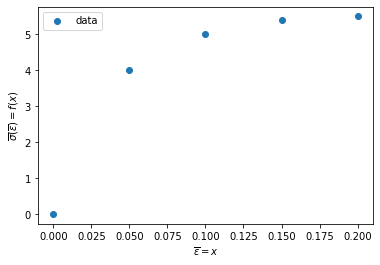

In [2]:
data = np.array([[0, 0], [0.05, 4], [0.1, 5], [0.15, 5.4], [0.2, 5.5]])
x = data[:, 0]
f = data[:, 1]
fig_xf = plt.figure()
plt.scatter(x, f, label='data')
plt.xlabel('$\\overline{\\varepsilon} = x$')
plt.ylabel('$\\overline{\\sigma}(\\overline{\\varepsilon}) = f(x)$')
plt.legend()
plt.show()

### Data for nonlinear material behavior

Data from [Fritzen, Fernández and Larsson, 2019](https://www.frontiersin.org/articles/10.3389/fmats.2019.00075/full)): 3-phase material (ideally plastic, linear hardening and elastic phases)

<img src="./files/figures/rve.png" width="250" align="left">
<img src="./files/figures/e_s.png" width="250" align="left">
<img src="./files/figures/e_svm.png" width="250" align="left">

Strain and stress tensors given as 6-dimensional vectors based on the following convention:
$$
\varepsilon = (
\varepsilon_{11},
\varepsilon_{22},
\varepsilon_{33},
\sqrt{2} \varepsilon_{12},
\sqrt{2} \varepsilon_{13},
\sqrt{2} \varepsilon_{23}
) 
\in \mathbb{R}^6
$$

$$
\sigma = (
\sigma_{11},
\sigma_{22},
\sigma_{33},
\sqrt{2} \sigma_{12},
\sqrt{2} \sigma_{13},
\sqrt{2} \sigma_{23}
) 
\in \mathbb{R}^6
$$

## 2. Data-driven material modeling

If (enough) data of a system is available, then a surrogate model replacing a complex one can be calibrated.

<img src="./files/figures/problem.png" alt="neural netowork" width="300" align="left">
<img src="./files/figures/e_svm.png" alt="neural netowork" width="300" align="left">

Questions:
* What about the quality of the surrogate model?
* Which properties are desired for the surrogate model?
* What about evaluation of a surrogate outside of data range?

### Options for the generation of a surrogate

* Interpolation
* "Sensible" functions based on experience
* Artificial intelligence